## Importing required libraries -

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cubic-zirconia/cubic_zirconia.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

In [3]:
import warnings
warnings.simplefilter('ignore')

In [4]:
pd.set_option("display.max_columns", None)
pd.options.display.float_format = '{:.2f}'.format

## Loading the dataset -

In [5]:
data = pd.read_csv(r'/kaggle/input/cubic-zirconia/cubic_zirconia.csv')

## Performing EDA & Data Cleaning -

In [6]:
data.sample(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
19677,19678,0.33,Premium,H,VS1,62.10,59.00,4.43,4.46,2.76,579
22713,22714,1.77,Premium,J,SI1,61.30,59.00,7.83,7.71,4.76,9704
25740,25741,1.00,Premium,J,VS1,62.80,57.00,6.39,6.35,4.00,4032
3985,3986,0.73,Premium,E,VS2,61.90,57.00,5.79,5.75,3.57,3127
4866,4867,1.03,Very Good,H,VS2,59.90,59.00,6.50,6.52,3.90,5620
24231,24232,0.25,Ideal,H,VVS1,62.50,56.00,4.06,4.03,2.53,577
9167,9168,0.73,Ideal,D,VVS2,62.20,56.00,5.79,5.73,3.58,4252
653,654,1.23,Premium,E,SI1,59.20,62.00,7.05,7.00,4.16,7274
6105,6106,1.23,Ideal,D,VVS2,62.40,55.00,6.87,6.82,4.27,13653
21427,21428,0.32,Ideal,E,IF,NaN,53.00,4.39,4.41,2.74,1018


### Shape of the dataset -

In [7]:
data.shape

(26967, 11)

In [8]:
print("No. of rows: ", data.shape[0])
print("No. of columns: ", data.shape[1])

No. of rows:  26967
No. of columns:  11


The dataset contains 26967 rows and 11 columns.

One of the columns 'Unnamed: 0' just represents the row number of it is useless for our analysis. 
Hence, it must be dropped.

In [9]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.00,0.80,0.48,0.20,0.40,0.70,1.05,4.50
depth,26270.00,61.75,1.41,50.80,61.00,61.80,62.50,73.60
table,26967.00,57.46,2.23,49.00,56.00,57.00,59.00,79.00
x,26967.00,5.73,1.13,0.00,4.71,5.69,6.55,10.23
y,26967.00,5.73,1.17,0.00,4.71,5.71,6.54,58.90
z,26967.00,3.54,0.72,0.00,2.90,3.52,4.04,31.80
price,26967.00,3939.52,4024.86,326.00,945.00,2375.00,5360.00,18818.00


### Checking for null values -

In [12]:
data.isna().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

The column 'depth' contains 697 null values.

### Checking for duplicate rows -

In [13]:
duplicate_rows = data[data.duplicated()]
print("No. of duplicate rows: ", duplicate_rows.shape[0])

No. of duplicate rows:  34


There are 34 duplicate rows in this dataset.
These rows should be dropped coz they are redundant and do not add any value to our analysis.

### Dropping all duplicate rows -

In [14]:
data.drop_duplicates(inplace=True)
print("No. of rows after dropping duplicates: ", data.shape[0])

No. of rows after dropping duplicates:  26933


### Imputing the null values -

In [15]:
print("Mean: {:.2f}".format(data['depth'].mean()))
print("Median: {:.2f}".format(data['depth'].median()))

Mean: 61.75
Median: 61.80


These values could be replaced with either the mean or the median of the entire column.
In this case both the mean and the median are approximately equal i.e. around 61.8

In [16]:
data['depth'].fillna(61.8, inplace=True)

### Data type of the variables -

In [17]:
numerical_data = data.select_dtypes(include='number')
num_cols = numerical_data.columns
print("Numerical columns: ", num_cols)

Numerical columns:  Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')


In [18]:
categorical_data = data.select_dtypes(exclude='number')
cat_cols = categorical_data.columns
print("Categorical columns: ", cat_cols)

Categorical columns:  Index(['cut', 'color', 'clarity'], dtype='object')


Out of remaining 10 columns, 3 independent variables are of object type.
Rest of the independent variables are floating point values.
The dependent variable 'price' is of integer type.

### Checking for outliers -

In [19]:
for col in num_cols:
    print("Column name - ", col)
    print("Mean: {:.2f}".format(data[col].mean()))
    print("Std: {:.2f}".format(data[col].std()))

Column name -  carat
Mean: 0.80
Std: 0.48
Column name -  depth
Mean: 61.75
Std: 1.39
Column name -  table
Mean: 57.46
Std: 2.23
Column name -  x
Mean: 5.73
Std: 1.13
Column name -  y
Mean: 5.73
Std: 1.17
Column name -  z
Mean: 3.54
Std: 0.72
Column name -  price
Mean: 3937.53
Std: 4022.55


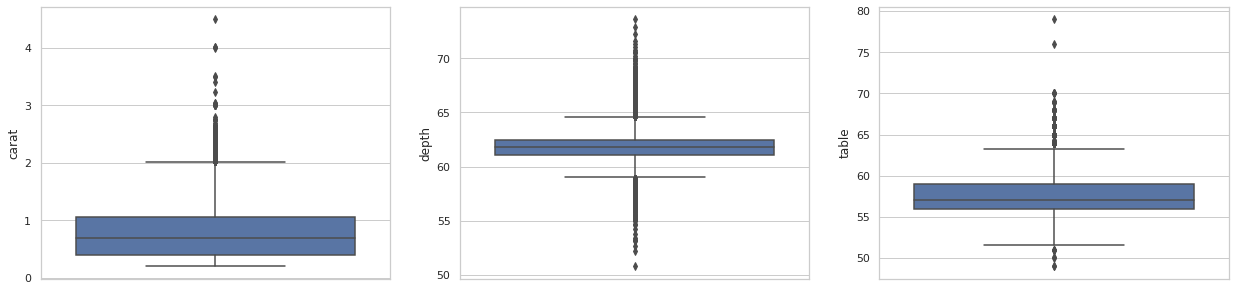

In [20]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(12, 5))
fig.subplots_adjust(right=1.5)

plt.subplot(1, 3, 1)
sns.boxplot(y=data['carat'])

plt.subplot(1, 3, 2)
sns.boxplot(y=data['depth'])

plt.subplot(1, 3, 3)
sns.boxplot(y=data['table'])

plt.show()

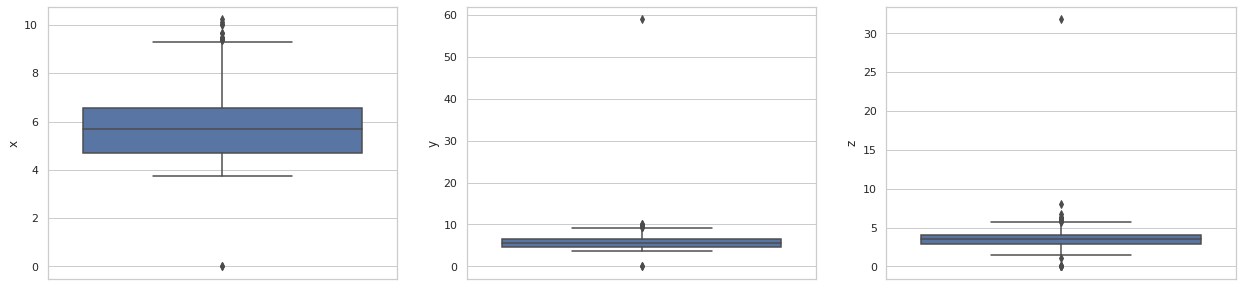

In [21]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(12, 5))
fig.subplots_adjust(right=1.5)

plt.subplot(1, 3, 1)
sns.boxplot(y=data['x'])

plt.subplot(1, 3, 2)
sns.boxplot(y=data['y'])

plt.subplot(1, 3, 3)
sns.boxplot(y=data['z'])

plt.show()

It seems like there are some outliers present in the dataset. So, we'll have to remove them.

### Inter Quartile Range -

In [22]:
Q1 = data[num_cols].quantile(0.25)
Q3 = data[num_cols].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

carat      0.65
depth      1.40
table      3.00
x          1.84
y          1.83
z          1.14
price   4411.00
dtype: float64


### Removing any potential outliers -

In [23]:
data = data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]
print("No. of rows remaining: ", data.shape[0])

No. of rows remaining:  23615


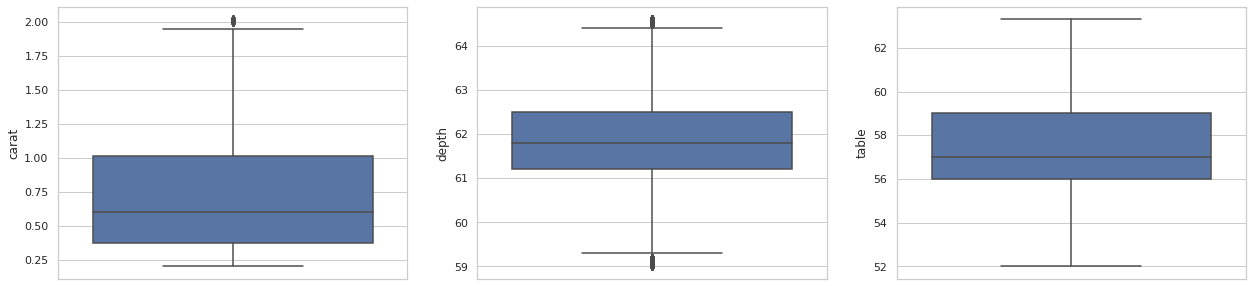

In [24]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(12, 5))
fig.subplots_adjust(right=1.5)

plt.subplot(1, 3, 1)
sns.boxplot(y=data['carat'])

plt.subplot(1, 3, 2)
sns.boxplot(y=data['depth'])

plt.subplot(1, 3, 3)
sns.boxplot(y=data['table'])

plt.show()

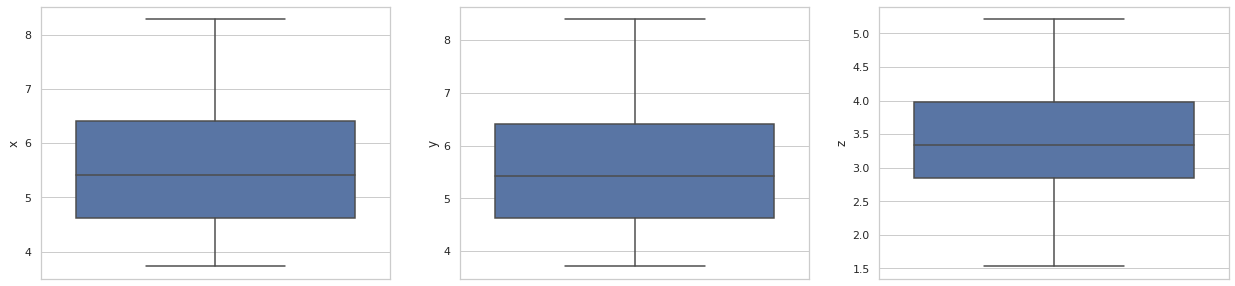

In [25]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(12, 5))
fig.subplots_adjust(right=1.5)

plt.subplot(1, 3, 1)
sns.boxplot(y=data['x'])

plt.subplot(1, 3, 2)
sns.boxplot(y=data['y'])

plt.subplot(1, 3, 3)
sns.boxplot(y=data['z'])

plt.show()

## Analysis of Categorical columns -

Data distribution based on the cut quality of cubic zirconia -

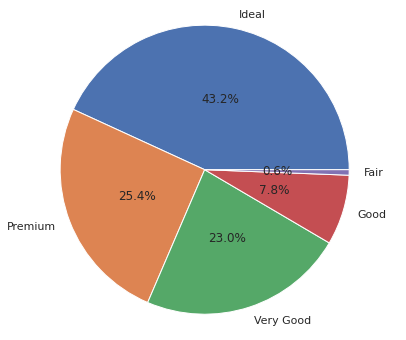

In [26]:
x = data['cut'].value_counts().values
plt.figure(figsize=(7, 6))
plt.pie(x, center=(0, 0), radius=1.5, labels=data['cut'].unique(), autopct='%1.1f%%', pctdistance=0.5)
plt.axis('equal')
plt.show()

The pie chart shows that most of the diamonds are of Ideal cut quality, followed by Premium and Very Good.

Data distribution based on the color of cubic zirconia -

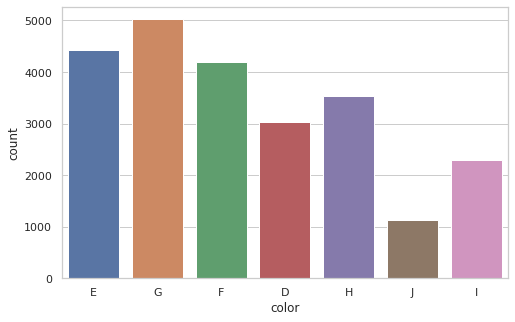

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(x='color', data=data)
plt.show()

This shows that most of the diamonds are of color 'G', followed by 'E' and 'F'.

Data distribution based on the clarity of cubic zirconia -

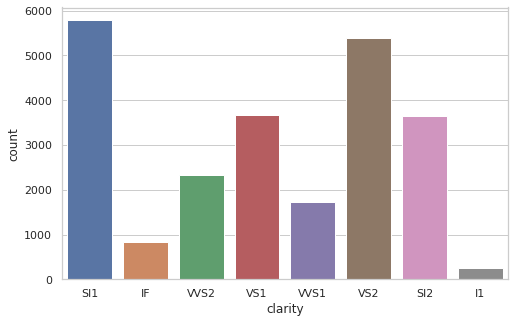

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot(x='clarity', data=data)
plt.show()

The above graph shows that most of the diamonds are of SI1 quality, followed by VS2 and VS1.

Average price categrized by Cut, Color & Clarity of the diamonds -

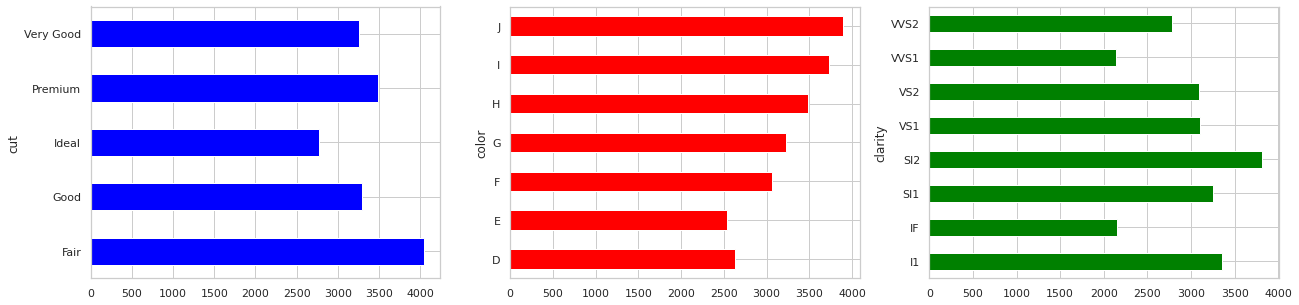

In [29]:
fig = plt.figure(figsize=(12, 5))
fig.subplots_adjust(right=1.5)

plt.subplot(1, 3, 1)
data['price'].groupby(data['cut']).mean().plot(kind='barh', color='blue')

plt.subplot(1, 3, 2)
data['price'].groupby(data['color']).mean().plot(kind='barh', color='red')

plt.subplot(1, 3, 3)
data['price'].groupby(data['clarity']).mean().plot(kind='barh', color='green')

plt.show()

Therefore, the average price of the diamonds is maximum for those with Fair quality, 'J' color and SI2 clarity.

## Analysis of Numerical variables -

### Checking the distribution of data -

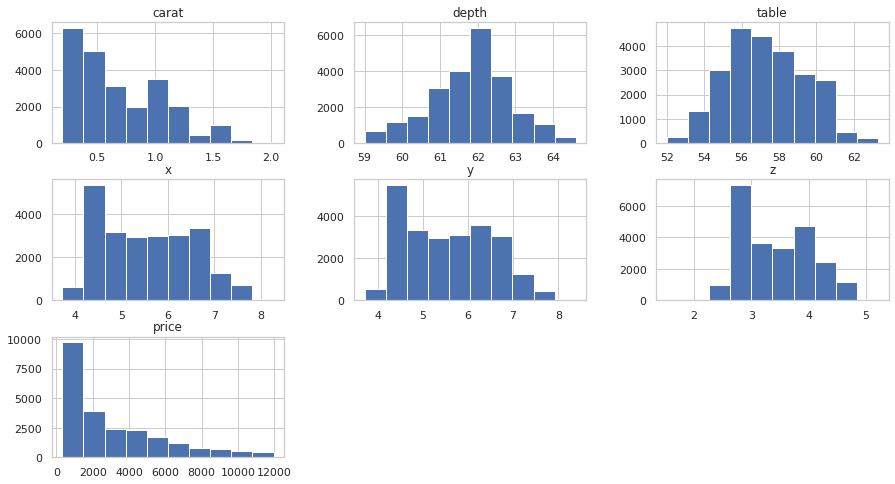

In [30]:
data[num_cols].hist(figsize=(15, 8))
plt.show()

In [31]:
data[num_cols].skew()

carat    0.72
depth   -0.20
table    0.39
x        0.27
y        0.26
z        0.27
price    1.21
dtype: float64

Here, we can clearly see that the 'price' and 'carat' columns are highly skewed towards the right.

In [32]:
data[num_cols].kurt()

carat   -0.34
depth    0.01
table   -0.16
x       -1.10
y       -1.11
z       -1.10
price    0.67
dtype: float64

In [33]:
def diagnostic_plot(data, col):
    fig = plt.figure(figsize=(9, 4))
    fig.subplots_adjust(right=1.5)
    
    plt.subplot(1, 2, 1)
    sns.distplot(data[col], kde=True, color='red')
    plt.title('Histogram')
    
    plt.subplot(1, 2, 2)
    stats.probplot(data[col], dist='norm', fit=True, plot=plt)
    plt.title('Q-Q Plot')
    
    plt.show()

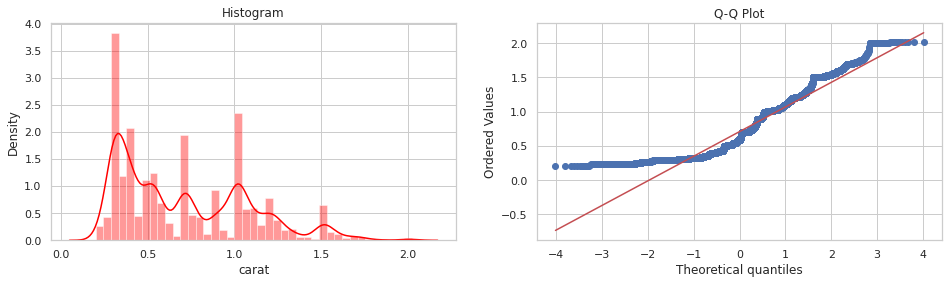

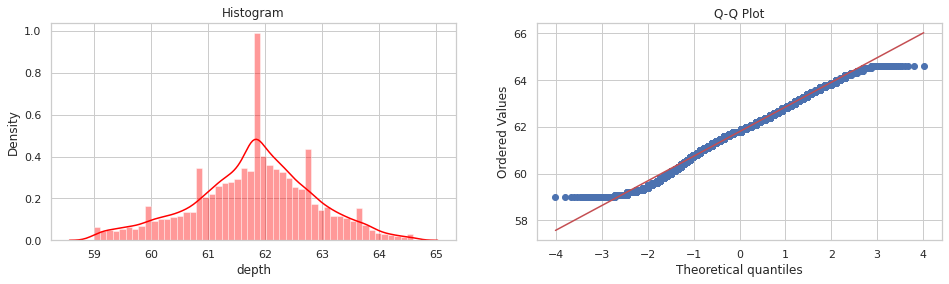

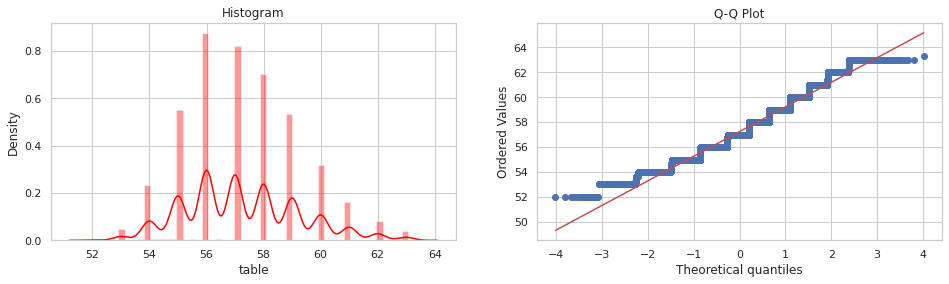

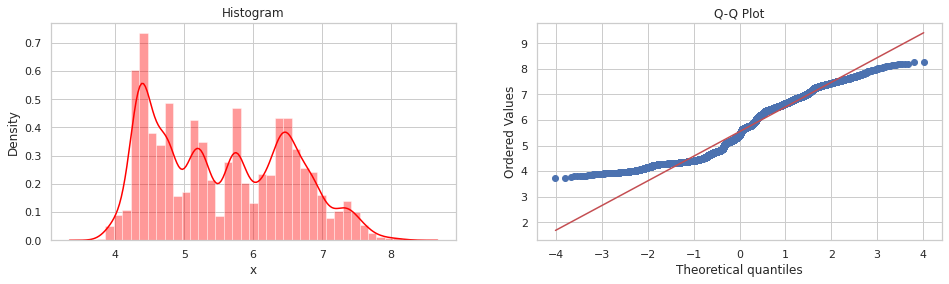

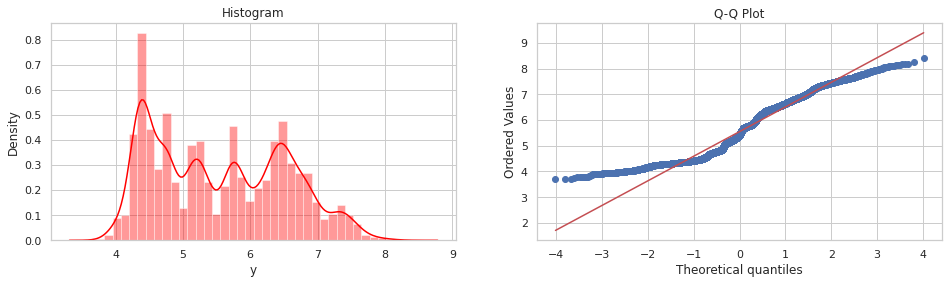

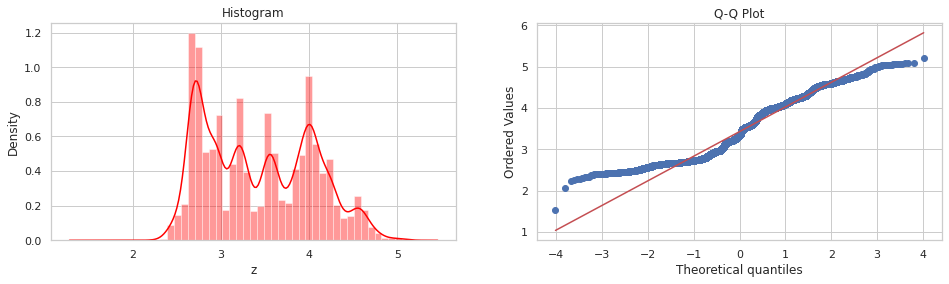

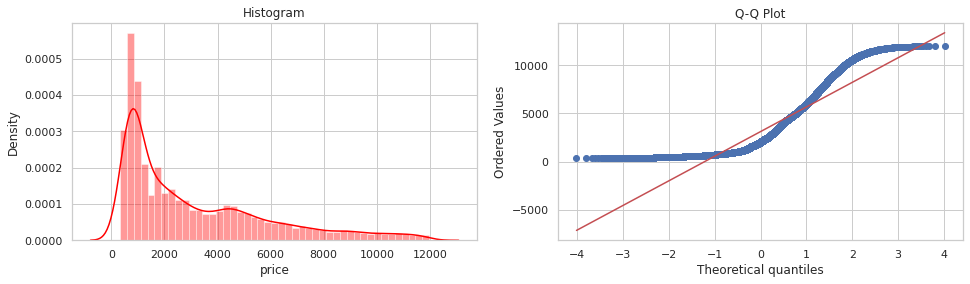

In [34]:
for col in num_cols:
    diagnostic_plot(data, col)

### Checking the correlation between independent variables -

In [35]:
X = data.drop('price', axis=1)
X.corr(method='spearman')

,carat,depth,table,x,y,z
carat,1.00,0.05,0.19,1.00,1.00,1.00
depth,0.05,1.00,-0.18,-0.00,-0.01,0.11
table,0.19,-0.18,1.00,0.19,0.18,0.16
x,1.00,-0.00,0.19,1.00,1.00,0.99
y,1.00,-0.01,0.18,1.00,1.00,0.99
z,1.00,0.11,0.16,0.99,0.99,1.00


The dimension columns x, y & z are highly correlated with each other.
The 'carat' columns is highly correlated with each one of the dimension columns.
Hence, we might remove 1 or 2 of these columns to avoid multi-collinearity.

### Checking the correlation of independent variables with dependent variable -

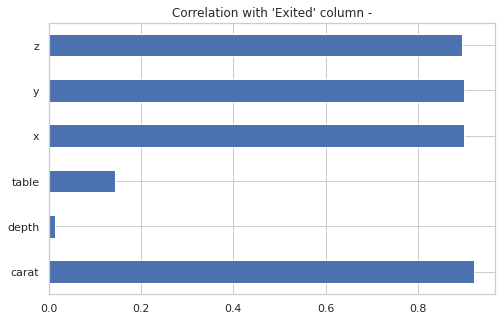

In [36]:
plt.figure(figsize=(8, 5))
X.corrwith(data['price']).plot(kind='barh', title="Correlation with 'Exited' column -")
plt.show()

The columns 'depth' & 'table' have significantly low correlation (0.02 & 0.18 repectively) with the output column 'price'.
They are not contributing much towards the generation of a particular outcome. 
Hence, they must be removed to reduce the dimensionality of the dataset.

### Plotting the Correlation Matrix

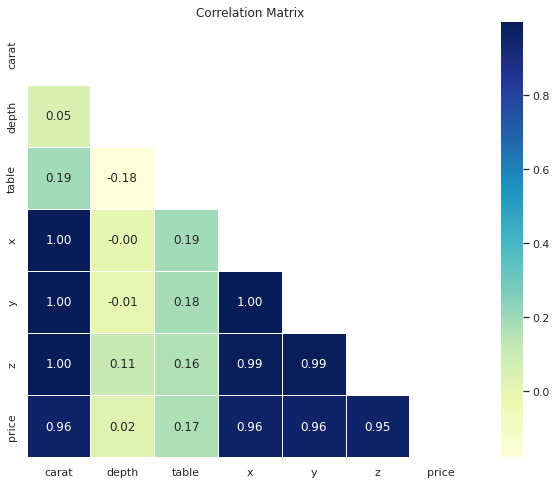

In [37]:
plt.figure(figsize = (10, 8))
corr = data.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', linewidths=1, fmt=".2f")
cormat.set_title('Correlation Matrix')
plt.show()

## Feature Engineering 

In [38]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.10,58.00,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.80,58.00,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.20,60.00,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.60,56.00,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.40,59.00,4.35,4.43,2.65,779


In [39]:
cat_feature=[feature for feature in data.columns if data[feature].dtype=='O']
print(cat_feature)

['cut', 'color', 'clarity']


In [40]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [41]:
data['cut']=data['cut'].map({"Ideal":0,'Premium':1,"Very Good":2,'Good':3,"Fair":4})

In [42]:
print(data['color'].unique())
print(data['clarity'].unique())

['E' 'G' 'F' 'D' 'H' 'J' 'I']
['SI1' 'IF' 'VVS2' 'VS1' 'VVS1' 'VS2' 'SI2' 'I1']


In [43]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [44]:
for feature in ['color','clarity']:
    data[feature]=labelencoder.fit_transform(data[feature])

In [45]:
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,0,1,2,62.10,58.00,4.27,4.29,2.66,499
1,0.33,1,3,1,60.80,58.00,4.42,4.46,2.70,984
2,0.90,2,1,7,62.20,60.00,6.04,6.12,3.78,6289
3,0.42,0,2,4,61.60,56.00,4.82,4.80,2.96,1082
4,0.31,0,2,6,60.40,59.00,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,1,3,2,62.30,58.00,6.61,6.52,4.09,5408
26963,0.33,0,4,1,61.90,55.00,4.44,4.42,2.74,1114
26964,0.51,1,1,5,61.70,58.00,5.12,5.15,3.17,1656
26965,0.27,2,2,7,61.80,56.00,4.19,4.20,2.60,682


In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(data)

In [47]:
df_scaled

array([[-1.08841826, -0.95954952, -0.91911564, ..., -1.28263255,
        -1.25502916, -0.94085954],
       [-1.00869416,  0.02600032,  0.26565051, ..., -1.10957732,
        -1.18967358, -0.76637331],
       [ 0.50606377,  1.01155016, -0.91911564, ...,  0.58025606,
         0.57492707,  1.14218222],
       ...,
       [-0.53034955,  0.02600032, -0.91911564, ..., -0.4071767 ,
        -0.42174552, -0.52461095],
       [-1.16814236,  1.01155016, -0.32673256, ..., -1.37425002,
        -1.35306253, -0.87502247],
       [ 1.43617829,  0.02600032,  2.04279972, ...,  1.35391472,
         1.37553292,  0.73816566]])

In [48]:
x=data.iloc[:,:-1]

In [49]:
x

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,0,1,2,62.10,58.00,4.27,4.29,2.66
1,0.33,1,3,1,60.80,58.00,4.42,4.46,2.70
2,0.90,2,1,7,62.20,60.00,6.04,6.12,3.78
3,0.42,0,2,4,61.60,56.00,4.82,4.80,2.96
4,0.31,0,2,6,60.40,59.00,4.35,4.43,2.65
...,...,...,...,...,...,...,...,...,...
26962,1.11,1,3,2,62.30,58.00,6.61,6.52,4.09
26963,0.33,0,4,1,61.90,55.00,4.44,4.42,2.74
26964,0.51,1,1,5,61.70,58.00,5.12,5.15,3.17
26965,0.27,2,2,7,61.80,56.00,4.19,4.20,2.60


In [50]:
y=data.iloc[:,-1:]

In [51]:
y

,price
0,499
1,984
2,6289
3,1082
4,779
...,...
26962,5408
26963,1114
26964,1656
26965,682


In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

## Creating Model With Linear Regression - 87.66%

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [55]:
reg_pred=regressor.predict(x_test)

In [56]:
reg_pred

array([[3217.88335821],
       [1584.91700228],
       [1131.72276052],
       ...,
       [2620.10933875],
       [5129.42104571],
       [5375.1946228 ]])

<AxesSubplot:ylabel='Density'>

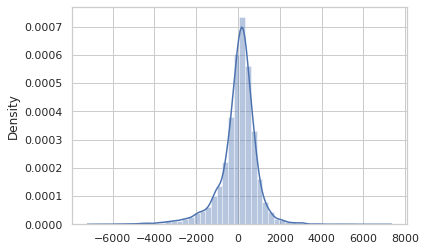

In [57]:
sns.distplot(reg_pred-y_test)

In [58]:
from sklearn.metrics import  r2_score 

In [59]:
score=r2_score(reg_pred,y_test)

In [60]:
score

0.8766543770881042

## Creating Model with Ridge Regression - 87.65%

In [61]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [62]:
ridge=Ridge()

In [63]:
parameter={'alpha':[0.01,0.001,0.0001,0.5,1]}
ridgecv=GridSearchCV(ridge,parameter,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.001, 0.0001, 0.5, 1]},
             scoring='neg_mean_squared_error')

In [64]:
print(ridgecv.best_params_)

{'alpha': 0.5}


In [65]:
ridge_pred=ridgecv.predict(x_test)

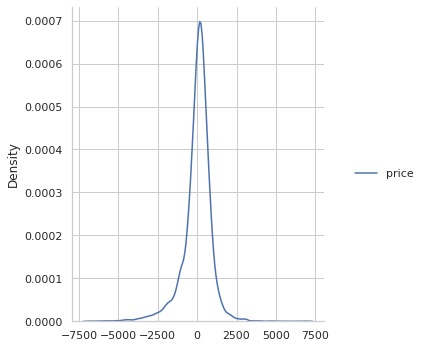

In [66]:
sns.displot(ridge_pred-y_test,kind='kde')

In [67]:
rrscore=r2_score(ridge_pred,y_test)

In [68]:
rrscore

0.8765347329503855

## Creating Model With Lasso Regression - 87.63%

In [69]:
from sklearn.linear_model import Lasso

In [70]:
lasso=Lasso()

In [71]:
parameter={'alpha':[0.01,0.001,0.0001,0.5,1]}
lassocv=GridSearchCV(lasso,parameter,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.001, 0.0001, 0.5, 1]},
             scoring='neg_mean_squared_error')

In [72]:
print(lassocv.best_params_)

{'alpha': 0.5}


In [73]:
lasso_pred=lassocv.predict(x_test)

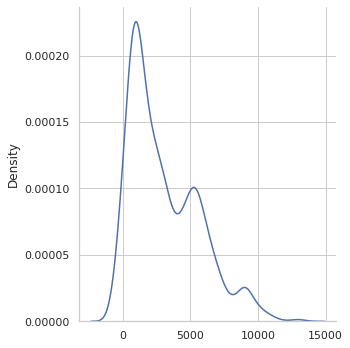

In [74]:
sns.displot(lasso_pred,kind='kde')

In [75]:
lrscore=r2_score(lasso_pred,y_test)

In [76]:
lrscore

0.8763016211053882

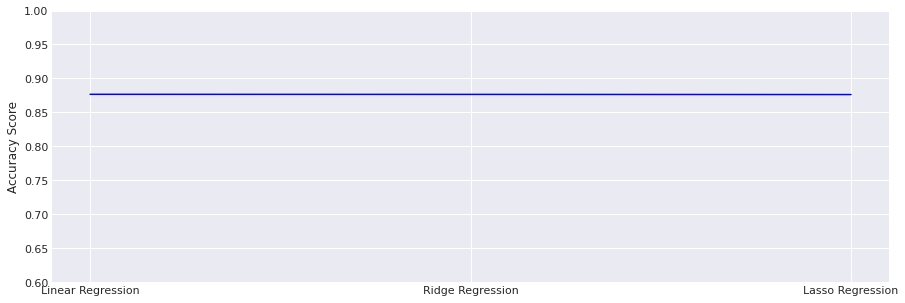

In [77]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15, 5))
models = ['Linear Regression', 'Ridge Regression','Lasso Regression']
test_accuracy = [score, rrscore,lrscore]
plt.plot(models, test_accuracy, color='blue')
plt.ylim(0.60, 1.0)
plt.ylabel("Accuracy Score")
plt.show()

In [78]:
%%time
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
test_score=[]
train_score=[]
modell=[]

from sklearn.pipeline import Pipeline
pipeline_lr = Pipeline([('lr', LinearRegression())])
pipeline_svr = Pipeline([('svr', SVR())])
pipeline_dt = Pipeline([('dt', DecisionTreeRegressor())])
pipeline_knn = Pipeline([('knn', KNeighborsRegressor())])
pipelines_rf = Pipeline([('rf', RandomForestRegressor())])
pipelines_ab = Pipeline([('ab', AdaBoostRegressor())])
pipelines_gb = Pipeline([('gb', GradientBoostingRegressor())])
pipelines_xgb = Pipeline([('xgb', xgb.XGBRegressor())])

pipelines = [pipeline_lr, pipeline_svr, pipeline_dt, pipeline_knn,pipelines_rf,pipelines_ab, pipelines_xgb, pipelines_xgb]

pipe_dict = {0: 'Linear Regression', 
             1: 'Support Vector Regression', 
             2: 'Decision Tree Regression',
             3: 'K-Neighbors Regression',
             4: 'Random Forest Regression',
             5: 'Ada Boost',
             6: 'Gradient Boost',
             7: 'Xgboost'}

for pipe in pipelines:
    pipe.fit(x_train, y_train)
    
for i, model in enumerate(pipelines):
    test_score.append(model.score(x_test, y_test))
    train_score.append(model.score(x_train, y_train))
    modell.append(pipe_dict[i])

CPU times: user 57 s, sys: 690 ms, total: 57.7 s
Wall time: 51.5 s


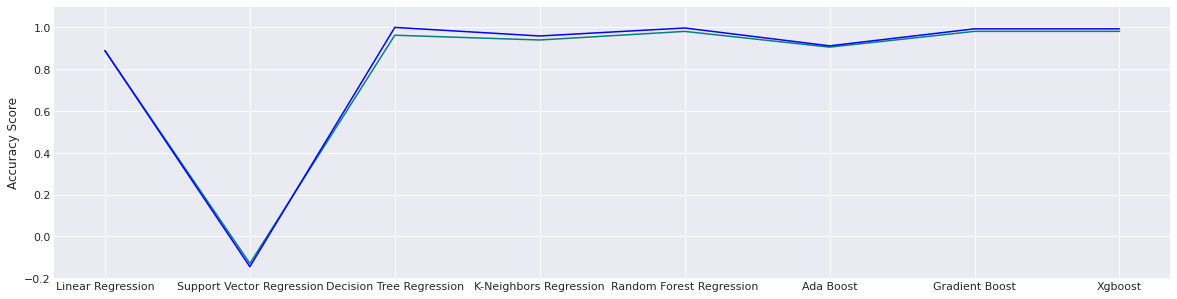

In [79]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20, 5))
plt.plot(modell,test_score, color='teal')
plt.plot(modell,train_score, color='blue')
plt.ylim(-0.2, 1.1)
plt.ylabel("Accuracy Score")
plt.show()

In [80]:
for i, model in enumerate(pipelines):
    print(f'{pipe_dict[i]} has test accuracy: {round(model.score(x_test, y_test),2)}')
    print(f'{pipe_dict[i]} has train accuracy: {round(model.score(x_train, y_train),2)}')
    print('')

Linear Regression has test accuracy: 0.89
Linear Regression has train accuracy: 0.89

Support Vector Regression has test accuracy: -0.13
Support Vector Regression has train accuracy: -0.14

Decision Tree Regression has test accuracy: 0.96
Decision Tree Regression has train accuracy: 1.0

K-Neighbors Regression has test accuracy: 0.94
K-Neighbors Regression has train accuracy: 0.96

Random Forest Regression has test accuracy: 0.98
Random Forest Regression has train accuracy: 1.0

Ada Boost has test accuracy: 0.91
Ada Boost has train accuracy: 0.91

Gradient Boost has test accuracy: 0.98
Gradient Boost has train accuracy: 0.99

Xgboost has test accuracy: 0.98
Xgboost has train accuracy: 0.99

